# **Kaggle Installation**

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle/

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:04<00:00, 92.8MB/s]
100% 428M/428M [00:04<00:00, 102MB/s] 


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

# **Importing Files**

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

#importing audio library files
import librosa
import librosa.display

#importing files to play the audio
from IPython.display import Audio

#importing warning files
import warnings
warnings.filterwarnings('ignore')

from keras import utils

# **Loading the Dataset**

In [6]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
  if len(paths) == 2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [7]:
len(paths)

2800

In [8]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

# **Creating a dataframe**

In [9]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust
2796,/content/tess toronto emotional speech set dat...,disgust
2797,/content/tess toronto emotional speech set dat...,disgust
2798,/content/tess toronto emotional speech set dat...,disgust


# **Exploratory Data Analysis**

In [10]:
df['label'].value_counts()

,count
label,
sad,400
angry,400
happy,400
neutral,400
fear,400
ps,400
disgust,400


In [11]:
df['label_count'] = df['label'].value_counts()
df.drop('label_count', axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust
2796,/content/tess toronto emotional speech set dat...,disgust
2797,/content/tess toronto emotional speech set dat...,disgust
2798,/content/tess toronto emotional speech set dat...,disgust


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

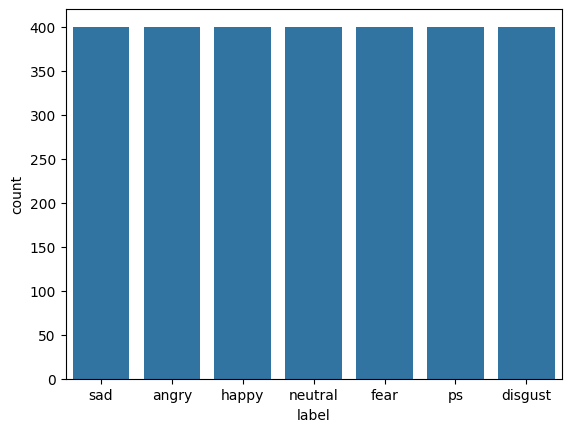

In [13]:
sns.countplot(data=df, x='label')

In [14]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10, 4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10, 4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()


In [15]:
df.drop('label_count', axis=1, inplace = True)

In [16]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...   sad
1  /content/tess toronto emotional speech set dat...   sad
2  /content/tess toronto emotional speech set dat...   sad
3  /content/tess toronto emotional speech set dat...   sad
4  /content/tess toronto emotional speech set dat...   sad
['sad' 'angry' 'happy' 'neutral' 'fear' 'ps' 'disgust']


In [17]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_name_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_sure_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_walk_sad.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_long_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_yearn_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_keen_disgust.wav'],
      dtype=object)

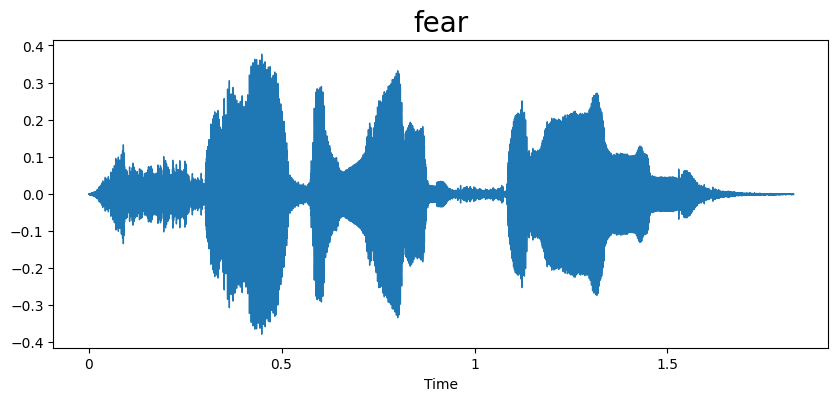

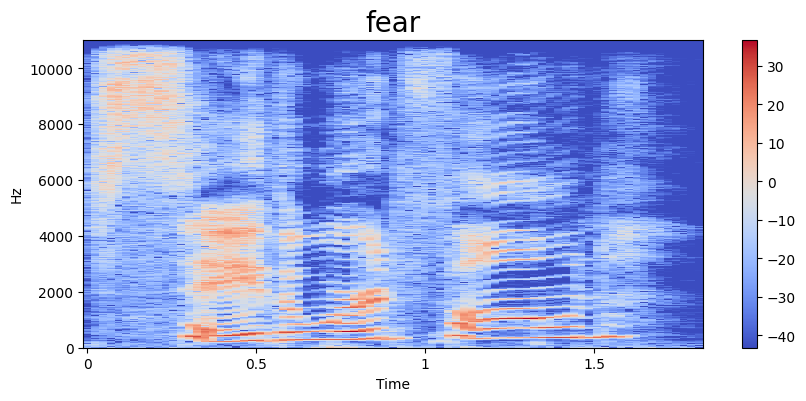

In [18]:
emotion = 'fear'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

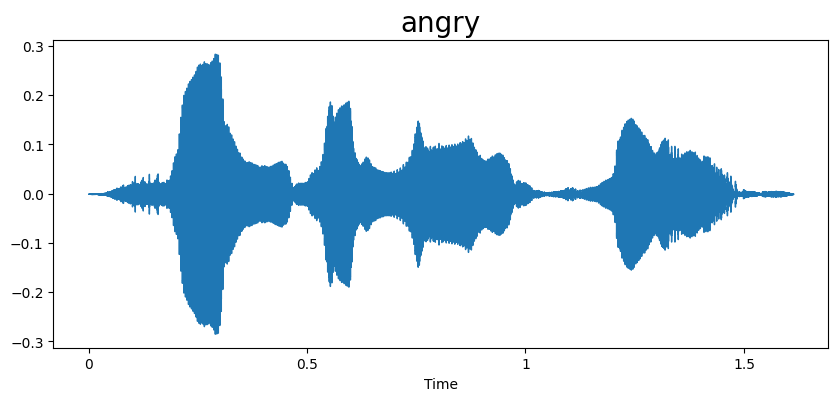

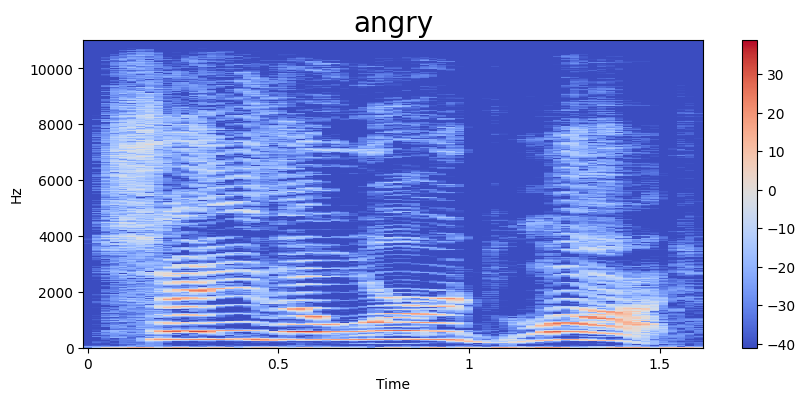

In [19]:
emotion = 'angry'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

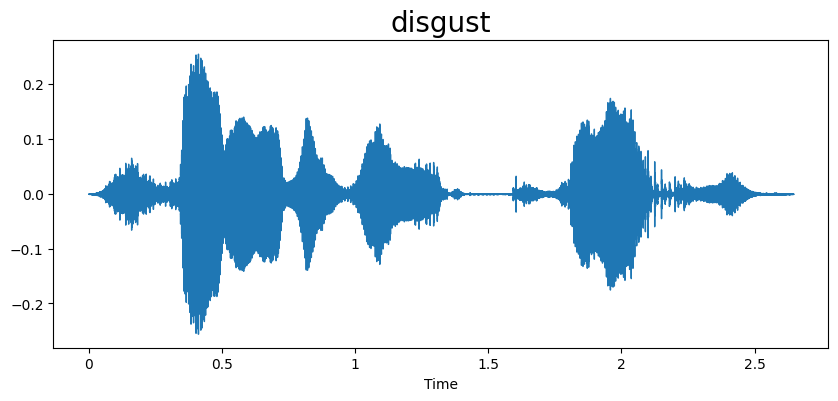

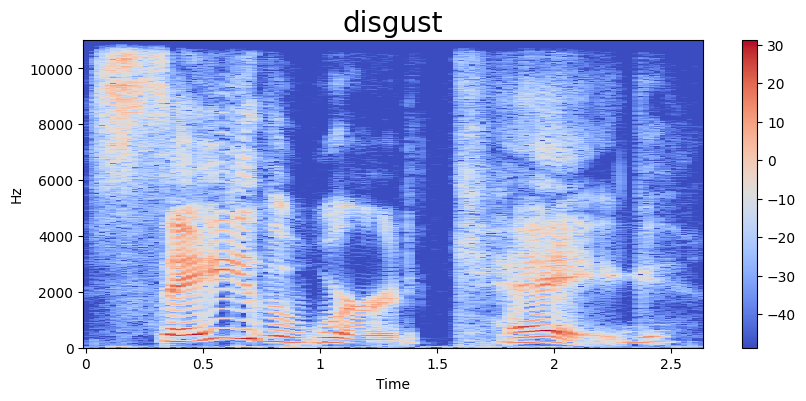

In [20]:
emotion = 'disgust'
path = df['speech'][df['label']==emotion].iloc[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

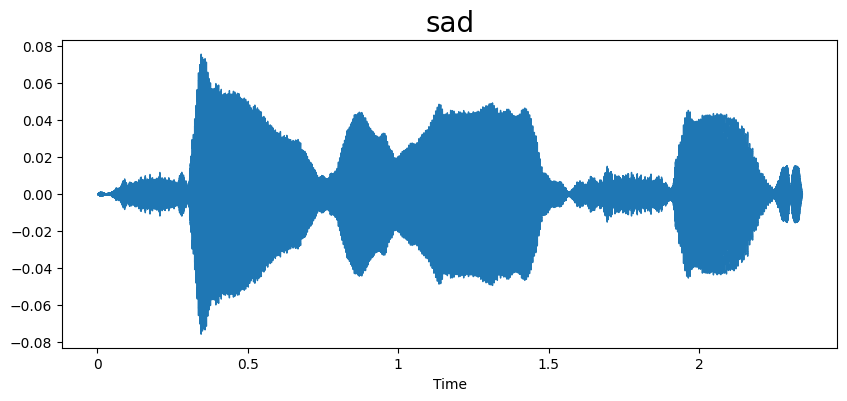

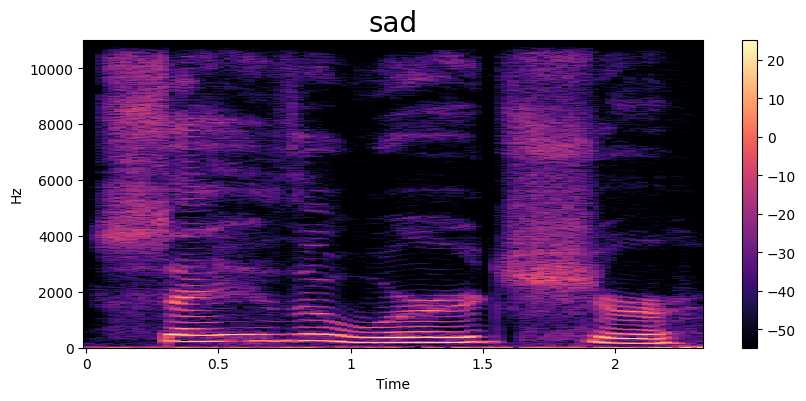

In [21]:
emotion = 'sad'
path = df['speech'][df['label']==emotion].iloc[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

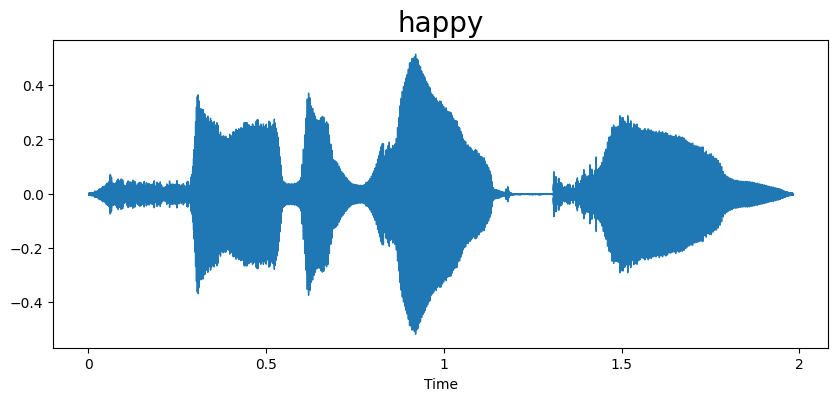

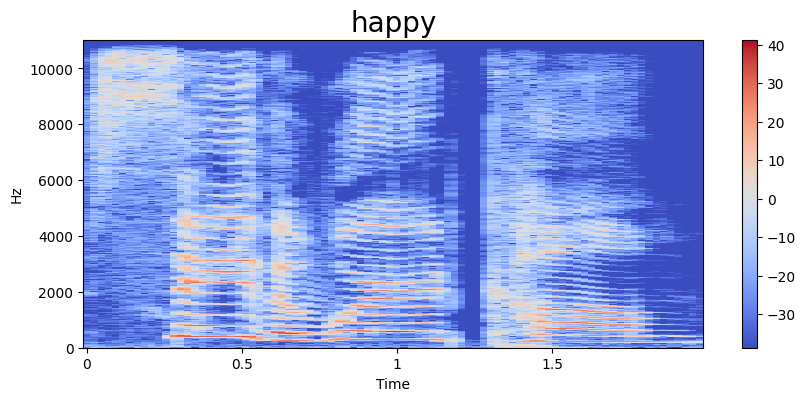

In [22]:
emotion = 'happy'
path = df['speech'][df['label']==emotion].iloc[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

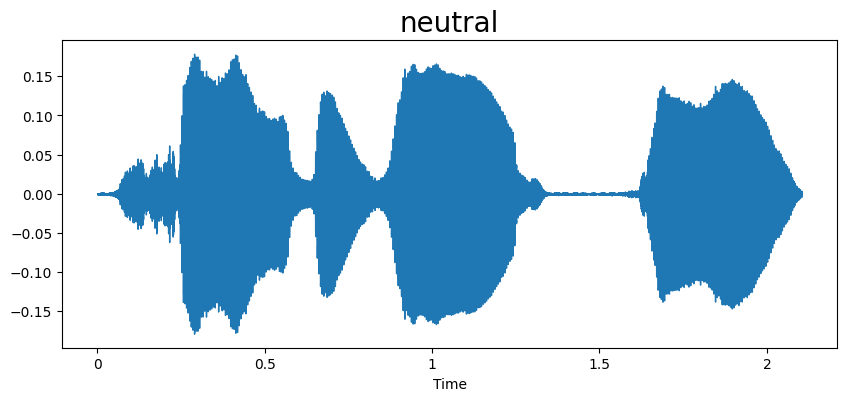

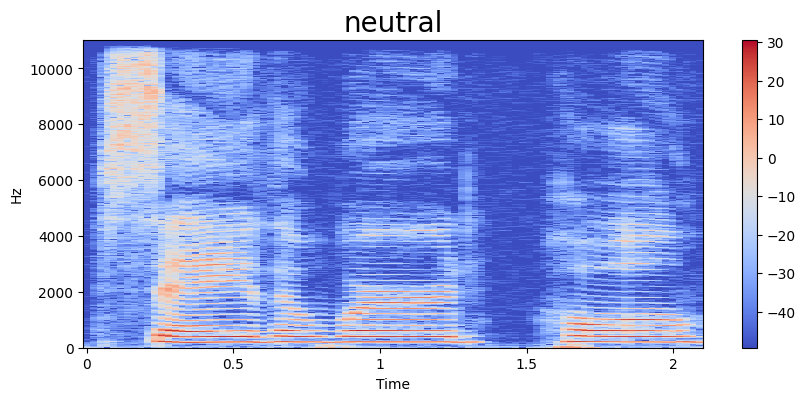

In [23]:
emotion = 'neutral'
path = df['speech'][df['label']==emotion].iloc[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

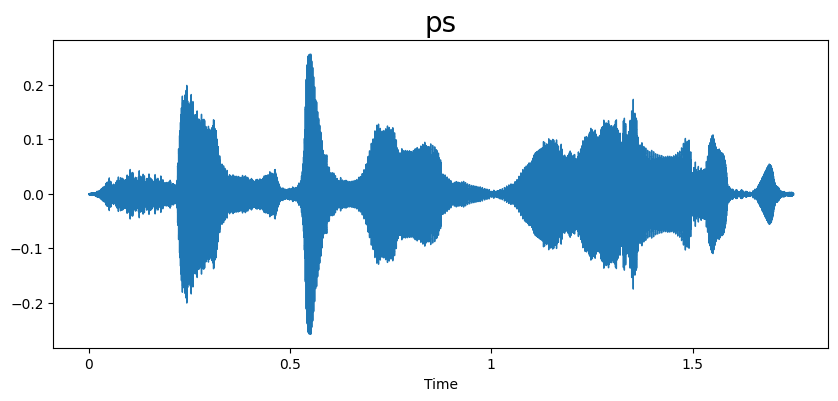

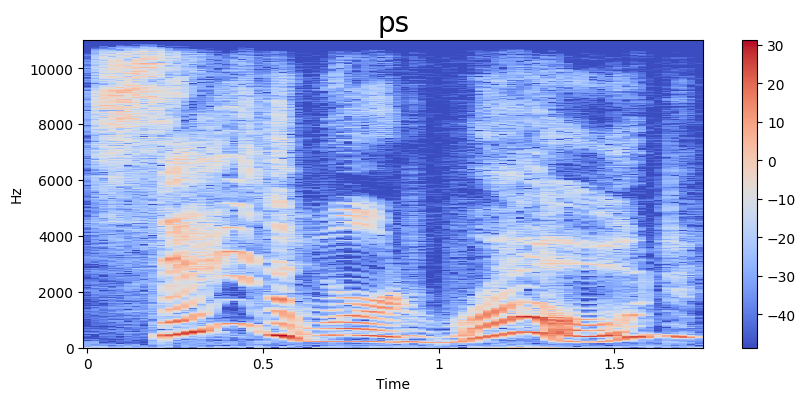

In [24]:
emotion = 'ps'     # ps--->pleasant surprise
path = df['speech'][df['label']==emotion].iloc[10]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction**

In [25]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [26]:
extract_mfcc(df['speech'][0])

array([-5.28461121e+02,  1.05532524e+02,  3.36951256e+01,  1.92747517e+01,
        2.64250469e+01,  6.69489050e+00, -7.71053171e+00, -7.96135378e+00,
       -1.92235146e+01, -1.46670318e+00, -1.49978819e+01, -6.07192707e+00,
       -8.80677700e+00,  1.85927585e-01,  2.99492812e+00, -1.16085374e+00,
        2.00999284e+00,  3.71909976e+00,  1.77838790e+00, -9.77266026e+00,
        3.93785286e+00, -7.94986010e+00, -5.16587114e+00, -6.02338731e-01,
       -1.09397478e+01,  3.42276263e+00, -1.50507879e+00,  5.47776318e+00,
        1.80570650e+00,  8.28636551e+00,  4.96863747e+00,  8.17939377e+00,
        6.43163264e-01,  1.13969660e+01,  1.51086721e+01,  1.64546185e+01,
        2.06323547e+01,  1.67987442e+01,  4.09857035e+00,  9.22925091e+00],
      dtype=float32)

In [27]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [28]:
X_mfcc

,speech
0,"[-528.4611, 105.532524, 33.695126, 19.274752, ..."
1,"[-510.73102, 95.49697, 21.746002, 5.636676, 21..."
2,"[-526.0847, 112.26481, 32.037457, 6.9437075, 1..."
3,"[-563.7178, 113.821266, 40.814095, 22.508987, ..."
4,"[-540.79266, 98.070404, 38.587116, 11.319377, ..."
...,...
2795,"[-471.9949, 102.390114, 14.029285, 7.79433, 18..."
2796,"[-463.48773, 99.21175, 25.25579, 5.409088, 17...."
2797,"[-452.73755, 127.53739, 34.25469, -3.499513, -..."
2798,"[-499.05136, 121.57547, 29.501469, -14.094628,..."


In [29]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename, duration=3, offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [30]:
extract_mfcc(df['speech'][0])

array([-5.28461121e+02,  1.05532524e+02,  3.36951256e+01,  1.92747517e+01,
        2.64250469e+01,  6.69489050e+00, -7.71053171e+00, -7.96135378e+00,
       -1.92235146e+01, -1.46670318e+00, -1.49978819e+01, -6.07192707e+00,
       -8.80677700e+00,  1.85927585e-01,  2.99492812e+00, -1.16085374e+00,
        2.00999284e+00,  3.71909976e+00,  1.77838790e+00, -9.77266026e+00,
        3.93785286e+00, -7.94986010e+00, -5.16587114e+00, -6.02338731e-01,
       -1.09397478e+01,  3.42276263e+00, -1.50507879e+00,  5.47776318e+00,
        1.80570650e+00,  8.28636551e+00,  4.96863747e+00,  8.17939377e+00,
        6.43163264e-01,  1.13969660e+01,  1.51086721e+01,  1.64546185e+01,
        2.06323547e+01,  1.67987442e+01,  4.09857035e+00,  9.22925091e+00],
      dtype=float32)

In [31]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [32]:
#Input Split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [47]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y

<2800x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2800 stored elements in Compressed Sparse Row format>

In [34]:
y=y.toarray()

In [35]:
y.shape

(2800, 7)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

# **Creating the LSTM Model**

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.2461 - loss: 1.8808 - val_accuracy: 0.6607 - val_loss: 0.9145
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.5591 - loss: 1.0710 - val_accuracy: 0.7946 - val_loss: 0.5893
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.7323 - loss: 0.7224 - val_accuracy: 0.8286 - val_loss: 0.4152
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.8054 - loss: 0.5380 - val_accuracy: 0.9054 - val_loss: 0.2243
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.8639 - loss: 0.4345 - val_accuracy: 0.9250 - val_loss: 0.2525
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.8613 - loss: 0.4173 - val_accuracy: 0.9571 - val_loss: 0.1739
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.8971 - loss: 0.3131 - val_accuracy: 0.9357 - val_loss: 0.1755
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.9130 - loss: 0.2724 - val_accuracy: 0

# **Plotting the Results**

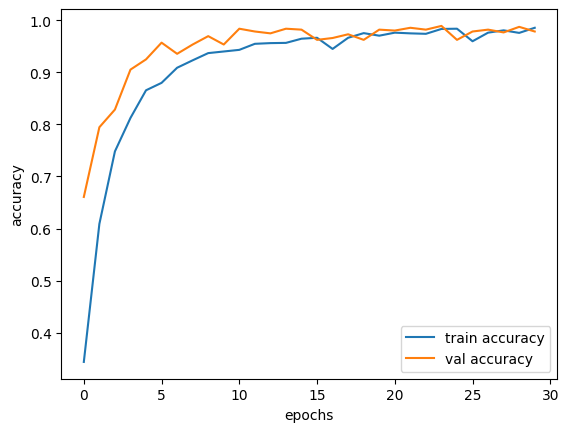

In [39]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

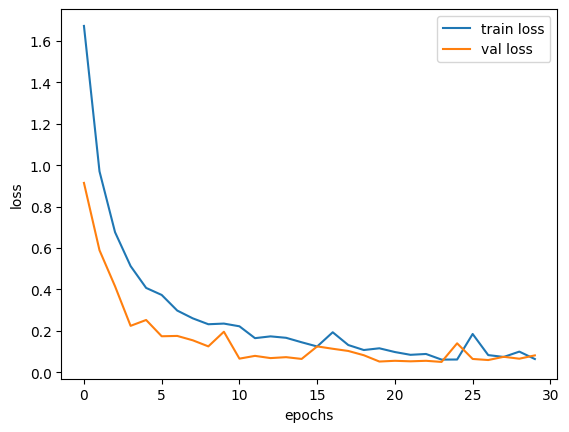

In [40]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [41]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

In [44]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 79   0   0   1   0   1   1]
 [  0  72   0   0   0   0   1]
 [  0   0  84   0   0   0   0]
 [  1   0   0 100   0   0   0]
 [  0   0   0   0  67   0   0]
 [  1   1   0   5   0  72   0]
 [  0   0   0   0   0   0  74]]


In [45]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.96      0.97        82
     disgust       0.99      0.99      0.99        73
        fear       1.00      1.00      1.00        84
       happy       0.94      0.99      0.97       101
     neutral       1.00      1.00      1.00        67
          ps       0.99      0.91      0.95        79
         sad       0.97      1.00      0.99        74

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



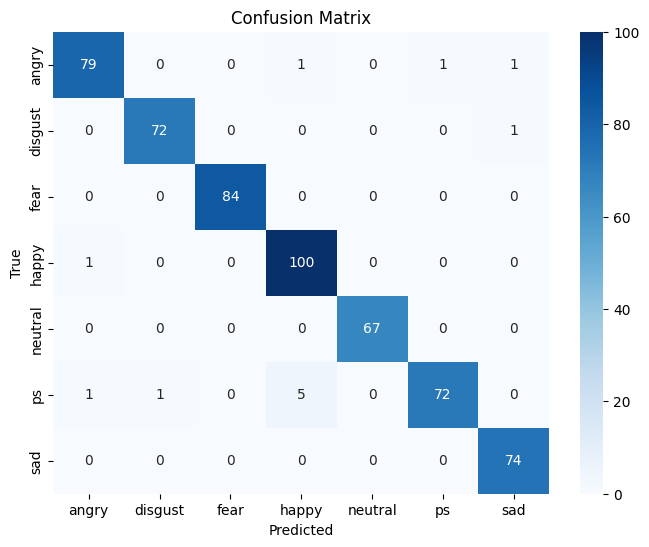

In [46]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()